# 作業

- 作業目標 : iris (dataset.load_iris()) 資料嘗試跑 kmeans (可以測試不同的群數 , init 等)

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn import metrics
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

iris = load_iris()

In [17]:
x = pd.DataFrame(iris['data'], columns = iris['feature_names'])
y = pd.DataFrame(iris['target'], columns = ['target_names'])

In [52]:
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [55]:
estimators = [('k_means_8', KMeans(n_clusters=8)),
              ('k_means_3', KMeans(n_clusters=3)),
              ('k_means_2', KMeans(n_clusters=2)),
              ('k_means++', KMeans(n_clusters=2, n_init=5,
                                               init='k-means++')),
              ('k_means_bad_init', KMeans(n_clusters=3, n_init=5,
                                               init='random'))]

0.34873453772193763
0.5528190123564091
0.681046169211746
0.681046169211746
0.5528190123564091


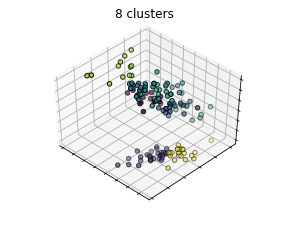

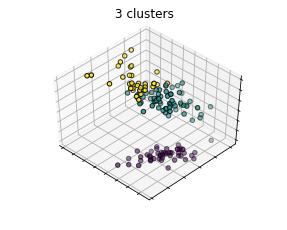

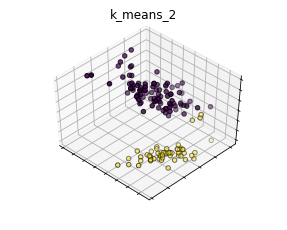

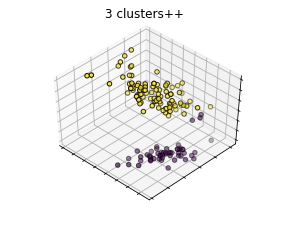

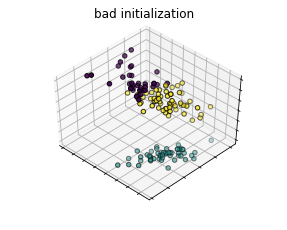

In [56]:
fignum = 1
titles = ['8 clusters', '3 clusters', 'k_means_2', '3 clusters++', 'bad initialization']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    
    est.fit(x)
    
    labels = est.labels_

    ax.scatter(x.iloc[:, 0], x.iloc[:, 1], x.iloc[:, 2],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    silhouette = metrics.silhouette_score(x, labels)
    print(silhouette)
    fignum = fignum + 1